In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


In [ ]:
dia=pd.read_csv("/content/drive/MyDrive/bank.csv")
dia.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
dia.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [ ]:
ind=dia[['age',	'job',	'marital',	'education',	'default',	'balance',	'housing',	'loan'	,'contact'	,'day',	'month',	'duration',	'campaign',	'pdays'	,'previous',	'poutcome']]
dep=dia['deposit']

In [ ]:
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

for col in ind.columns:
    if ind[col].dtype == 'object':
        ind[col] = LE.fit_transform(ind[col])


/tmp/ipython-input-1737546281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind[col] = LE.fit_transform(ind[col])
/tmp/ipython-input-1737546281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ind[col] = LE.fit_transform(ind[col])
/tmp/ipython-input-1737546281.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

In [ ]:
Logr=LogisticRegression()
Logr.fit(ind,dep)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
from sklearn.externals._packaging.version import PrePostDevType

In [ ]:
Logr.predict([[35, 2, 1, 3, 0, 1200, 1, 0, 1, 5, 7, 300, 2, -1, 0, 1]])


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['no'], dtype=object)

In [ ]:
#To find the accuracy
Logr.score(ind,dep)

0.759451711162874

In [ ]:
from sklearn.metrics import accuracy_score
pval=Logr.predict(ind)
accuracy_score(dep,pval)

0.759451711162874

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ValueError: X has 2 features, but LogisticRegression is expecting 16 features as input.

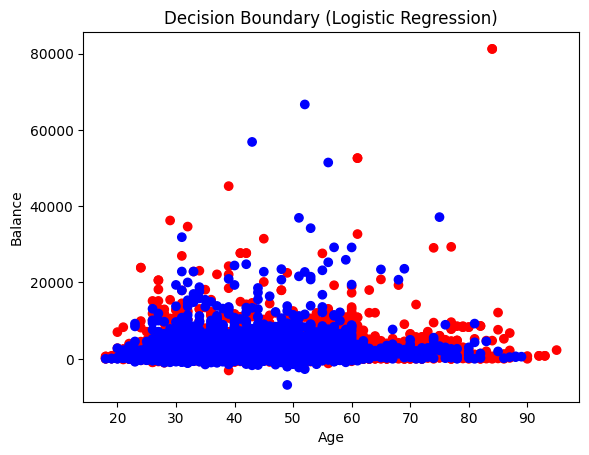

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# choose only 2 features for visualization
x1 = ind['age']
x2 = ind['balance']

plt.scatter(x1, x2, c=(dep=='yes'), cmap='bwr')
plt.xlabel("Age")
plt.ylabel("Balance")
plt.title("Decision Boundary (Logistic Regression)")

# create a grid
x1_range = np.linspace(x1.min(), x1.max(), 100)
x2_range = np.linspace(x2.min(), x2.max(), 100)
xx1, xx2 = np.meshgrid(x1_range, x2_range)

# compute probability
grid = np.c_[xx1.ravel(), xx2.ravel()]
Z = Logr.predict_proba(grid)[:,1].reshape(xx1.shape)

# contour line at probability = 0.5
plt.contour(xx1, xx2, Z, levels=[0.5], colors='black');

plt.show()
